In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

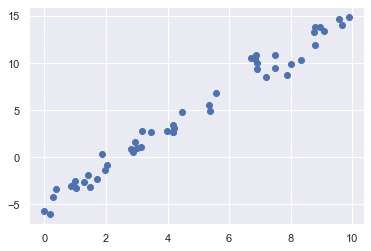

In [3]:
# if same random state is used output same results
rng = np.random.RandomState(1)
#   0-1

#rand -> 50 numbers
x = 10 * rng.rand(50)

#rand from standard normal distribution
#adding noise to data 
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y);

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:


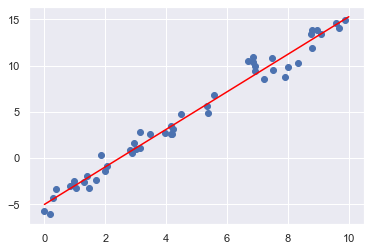

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

# np.newaxis  -> (50,1) creates shape
model.fit(x[:, np.newaxis], y)

#generate new data
xfit = np.linspace(0, 10, 1000)

#give xfit as x
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)

#plot ->connect
plt.plot(xfit, yfit,color='red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [6]:
rng = np.random.RandomState(45)

# 100 numbers and 3 columns
X = 10 * rng.rand(100, 3)

# multiply the factors - Dot product of two arrays.
y = 0.5 + np.dot(X, [1.5, -2., 1.])

# x(100,3) and y(prediction) ->(100,1)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000044
[ 1.5 -2.   1. ]



Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single LinearRegression estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.



# Basis Function Regression
One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. We have seen one version of this before, in the PolynomialRegression pipeline used in Hyperparameters and Model Validation and Feature Engineering. The idea is to take our multidimensional linear model:$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$. That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.


# Polynomial basis functions
This polynomial projection is useful enough that it is built into Scikit-Learn, using the PolynomialFeatures transformer:

In [7]:
#nonlinear -> polynomial

from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])

# 3->how many polynomial degree/if bias(c)=true it will take one element from above array as bias
poly = PolynomialFeatures(3, include_bias=False)

poly.fit_transform(x[:, None])  #think no y

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in Feature Engineering, the cleanest way to accomplish this is to use a pipeline. Let's make a 7th-degree polynomial model in this way:

In [8]:
#pipeline the poly and linear

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),  #polynomial degree = 7  ->x^7
                           LinearRegression())


With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. For example, here is a sine wave with noise:

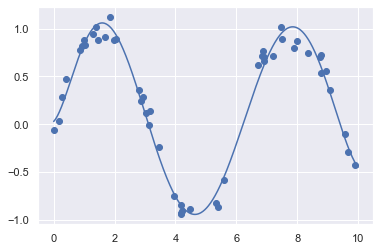

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)

#based on sin function & also add 10 percent noise
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!